# Data Preprocessing
### Converting ratings_1m.dat to ratings_1m.csv
'MovieLens 1M' will be used for performing hyperparameter tuning and assessing the performance of the developed models. Using this universe of movies and users, we can compare ourselves to the state-of-the-art models. Nevertheless, for the initial offline training of the best discovered model, we will extract 1M samples from the original 'MovieLens 25M' dataset, such that the distribution of users and movies is preserved as much as possible.

In [1]:
import csv

def convert_dat_to_csv(dat_file_path, csv_file_path, column_names=None):
    # Open the .dat file and read its contents
    with open(dat_file_path, 'r', encoding='latin1') as dat_file:
        lines = dat_file.readlines()

    # Open the .csv file in write mode
    with open(csv_file_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        # Write the column names to the first row of the CSV file
        writer.writerow(column_names)
        
        # Process each line from the .dat file
        for line in lines:
            # Split the line by '::' and remove any surrounding whitespace
            data = line.strip().split('::')
            # Write the data to the CSV file
            writer.writerow(data)

convert_dat_to_csv('ratings_1m.dat', 'ratings_1m.csv', ['userId', 'movieId', 'rating', 'timestamp'])

### Creating a 1M dataset from the 25M dataset for initial offline training

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from plot import plot_ratings_count

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('ratings.csv')

In [4]:
small = data.sample(n=1000000, random_state=42)

In [5]:
small["userId"].value_counts().describe()

count    142046.000000
mean          7.039973
std          11.509705
min           1.000000
25%           2.000000
50%           4.000000
75%           8.000000
max        1347.000000
Name: count, dtype: float64

In [5]:
small["movieId"].value_counts().describe()

count    23238.000000
mean        43.032963
std        154.696710
min          1.000000
25%          1.000000
50%          3.000000
75%         17.000000
max       3283.000000
Name: count, dtype: float64

In [10]:
small["rating"].mean()

3.5356275

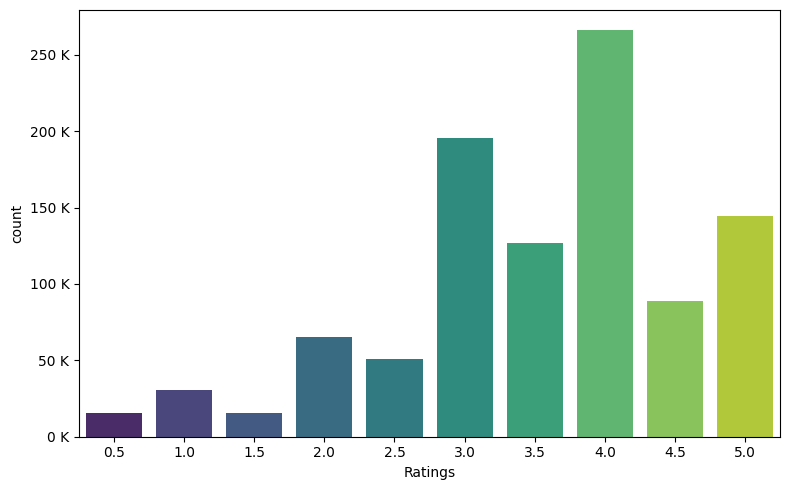

In [9]:
plot_ratings_count(small, scale=('K', 1000))

In [18]:
small.to_csv('ratings_small.csv', index=False)

>**Note**: Ratings are normalised before model training.

In [12]:
# get all 24M samples from data that are not in small
rest = data[~data.index.isin(small.index)]
rest.shape

(24000095, 4)

### Creating a fixed test set from the other ~24M samples
>**Note**: Each set of batches in continual learning will have its own validation set.

In [15]:
train, test = train_test_split(rest, test_size=0.04, random_state=42)
train.shape, test.shape

((23040091, 4), (960004, 4))

In [16]:
train.to_csv('ratings_batches.csv', index=False)
test.to_csv('ratings_test.csv', index=False)